In [1]:
import pandas as pd #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import numpy as np #For divergences/distances
import scipy as sp#For divergences/distances
import seaborn as sns #makes our plots look nicer
plt.rcParams["figure.figsize"] = (6,6)


# India

In [3]:
df = pd.read_csv('../Covid-case-data.csv')

In [256]:
df = df[df['location'] == 'United States']

In [2]:
df = pd.read_csv('india_covid_health_df.csv')

In [3]:
# Reformatting the date and sorting by the date for good plots.
df.date = df.date.apply(lambda x: '20'+x)
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date',ascending=True,inplace=True) 

In [5]:
df.head()

,Unnamed: 0,date,country,publisher,trunc_sentence,sentiment_score,topic,sentences,new_negativ_sent_score,new_cases,...,date.1,new_vaccinations,new_people_vaccinated_smoothed_per_hundred,total_cases,new_cases_smoothed,new_deaths_smoothed,hosp_patients,icu_patients,weekly_icu_admissions,new_vaccinations_smoothed
6672,6672,2021-01-01,IN,news.webindia123.com,[' Holidays have proven to be a catalyst of C...,"[{'label': 'POSITIVE', 'score': 0.988299965858...",1,[' Experts warn of catastrophic post-holiday C...,0.873436,19079.0,...,21-01-01,NaN,NaN,10305788.0,19524.286,267.857,NaN,NaN,NaN,NaN
6673,6673,2021-01-01,IN,avenuemail.in,[' The tests that were started in May have com...,"[{'label': 'NEGATIVE', 'score': 0.949746668338...",1,"[' Jamshedpur : Tata Main Hospital ( TMH ) , t...",0.618757,19079.0,...,21-01-01,NaN,NaN,10305788.0,19524.286,267.857,NaN,NaN,NaN,NaN
6675,6675,2021-01-02,IN,The Indian Express,[' It is when people leave behind their flaws ...,"[{'label': 'POSITIVE', 'score': 0.994831919670...",1,"["" New Year resolutions versus pandemic : What...",0.374001,18177.0,...,21-01-02,NaN,NaN,10323965.0,19445.000,259.000,NaN,NaN,NaN,NaN
6674,6674,2021-01-02,IN,ptinews.com,[' The two cases were found in Meerut and Gau...,"[{'label': 'NEGATIVE', 'score': 0.973843812942...",1,"[' Lucknow , Dec 30 ( PTI ) Traces of a new st...",0.732179,18177.0,...,21-01-02,NaN,NaN,10323965.0,19445.000,259.000,NaN,NaN,NaN,NaN
6696,6696,2021-01-02,IN,in.news.yahoo.com,"[' DEL56 PM-LD NEW YEAR As new year begins , ...","[{'label': 'POSITIVE', 'score': 0.999589860439...",1,"[' Highlights 1 January 2021 , 8:37 am*5-min ...",0.788990,18177.0,...,21-01-02,NaN,NaN,10323965.0,19445.000,259.000,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='date'>

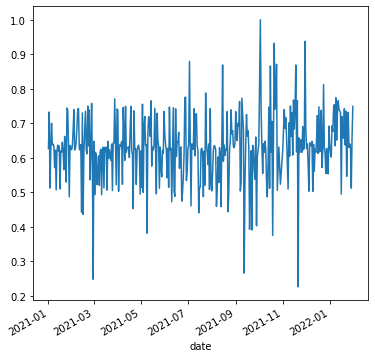

In [11]:
c_df.groupby('date')['new_negativ_sent_score'].median().plot()

<AxesSubplot:xlabel='date'>

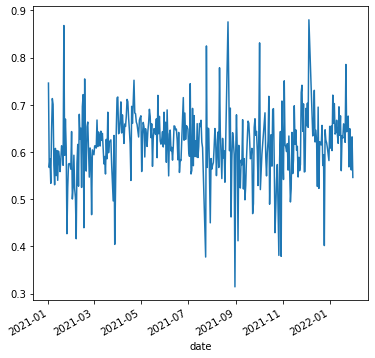

In [6]:
df.groupby('date')['new_negativ_sent_score'].mean().plot()

<AxesSubplot:xlabel='date'>

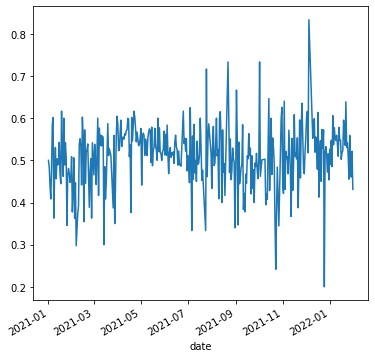

In [45]:
df.groupby('date')['neg_sentim_score'].mean().plot()

In [100]:
sentim = df.groupby('date')['neg_sentim_score'].mean()

<AxesSubplot:>

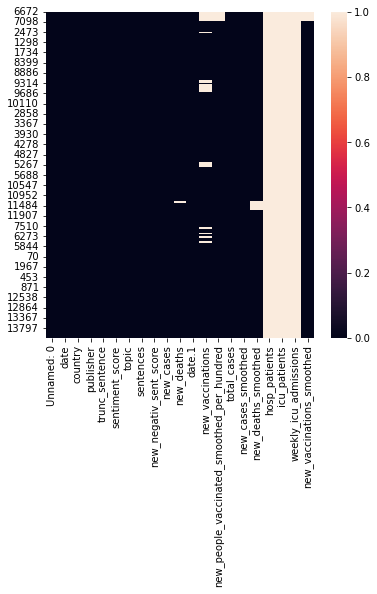

In [7]:
sns.heatmap(df.isna())

In [71]:
df['new_deaths'].fillna(value=df['new_deaths'].mean(), inplace=True)

In [74]:
copy_df = df.copy()

In [61]:
copy_df.dropna(inplace=True)

In [77]:
df.columns

Index(['Unnamed: 0', 'date', 'country', 'publisher', 'snippet',
       'body_tokens_normalized', 'trunc_sentence', 'sentiment_score',
       'neg_sentim_score', 'new_cases', 'new_deaths', 'date.1',
       'new_vaccinations', 'new_people_vaccinated_smoothed_per_hundred',
       'total_cases'],
      dtype='object')

In [102]:
vaccines = df['new_people_vaccinated_smoothed_per_hundred'].iloc[432:]
sentimate = df.neg_sentim_score.iloc[432:]

In [75]:
cases = df.groupby('date').mean()['new_cases']
deaths = copy_df.groupby('date').mean()['new_deaths']
# vaccines = copy_df.groupby('date').mean()['new_people_vaccinated_smoothed_per_hundred']

In [103]:
print(f'cases: {np.corrcoef(sentim,cases)[0][1]}')
print(f'deaths and sentim {np.corrcoef(sentim,deaths)[0][1]}')
print(f'vaccine and sentiment {np.corrcoef(sentimate,vaccines)[0][1]}')


cases: 0.2343650874649501
deaths and sentim 0.20268285828546523
vaccine and sentiment 0.001568731788250941


In [111]:
df.iloc[df.new_cases.argmax()]

Unnamed: 0                                                                                 3288
date                                                                        2021-05-06 00:00:00
country                                                                                      IN
publisher                                                                     millenniumpost.in
snippet                                       PM asks states to maintain Covid vaccination s...
body_tokens_normalized                        ['pm', 'asks', 'states', 'maintain', 'covid', ...
trunc_sentence                                ['PM asks states to maintain Covid vaccination...
sentiment_score                               [{'label': 'NEGATIVE', 'score': 0.634736835956...
neg_sentim_score                                                                            0.0
new_cases                                                                              414188.0
new_deaths                              

In [114]:
massive_decrease_cases = df[(df.date >= '2021-05-08') & (df.date <= '2021-06-08')]

In [115]:
steady_cases = df[(df.date >= '2021-05-08') & (df.date <= '2021-12-10')]

In [118]:
cases_steady = steady_cases.groupby('date').mean()['new_cases']
cases_decrease = massive_decrease_cases.groupby('date').mean()['new_cases']
# deaths = copy_df.groupby('date').mean()['new_deaths']

In [133]:
print(np.corrcoef(cases_steady, steady_cases.groupby('date').mean().neg_sentim_score)[0]) 
print(np.corrcoef(cases_decrease, massive_decrease_cases.groupby('date').mean().neg_sentim_score)[0])

[1.        0.1494805]
[1.         0.22472267]


<AxesSubplot:xlabel='date'>

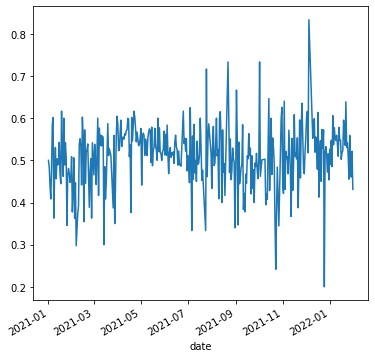

In [130]:
df.groupby('date').mean().neg_sentim_score.plot()

In [ ]:
### should try to isolate to specific time frames such as 2021-07 to 2022-01

<AxesSubplot:xlabel='date', ylabel='new_cases'>

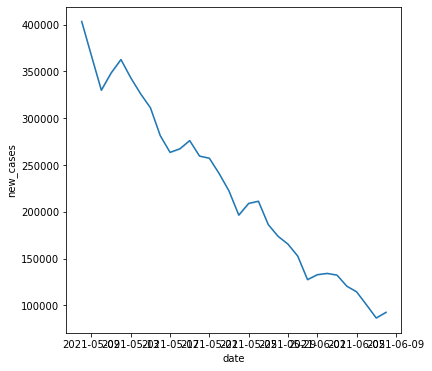

In [117]:
sns.lineplot(y = 'new_cases', x = 'date', data=massive_decrease_cases)

<AxesSubplot:xlabel='date', ylabel='new_cases'>

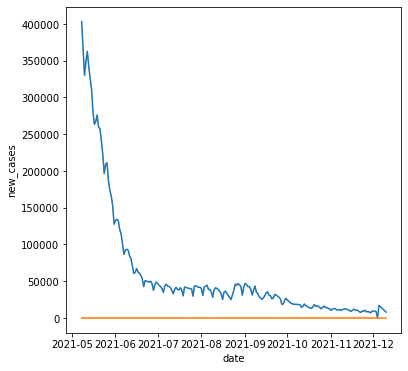

In [138]:
sns.lineplot(y = 'new_cases', x = 'date', data=steady_cases)
sns.lineplot(y = 'neg_sentim_score', x = 'date', data=steady_cases)

<AxesSubplot:xlabel='date', ylabel='neg_sentim_score'>

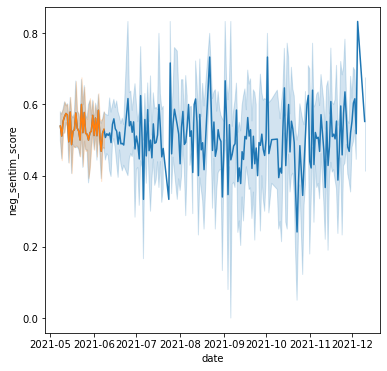

In [140]:
sns.lineplot(y = 'neg_sentim_score', x = 'date', data=steady_cases)

<AxesSubplot:xlabel='date', ylabel='neg_sentim_score'>

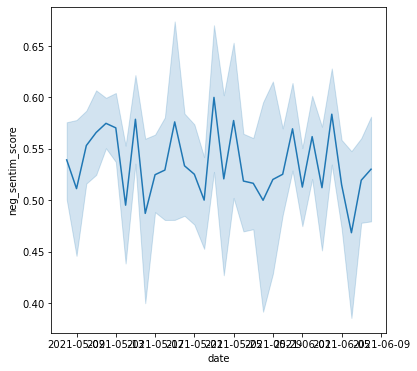

In [139]:
sns.lineplot(y = 'neg_sentim_score', x = 'date', data=massive_decrease_cases)

<AxesSubplot:xlabel='date', ylabel='new_cases'>

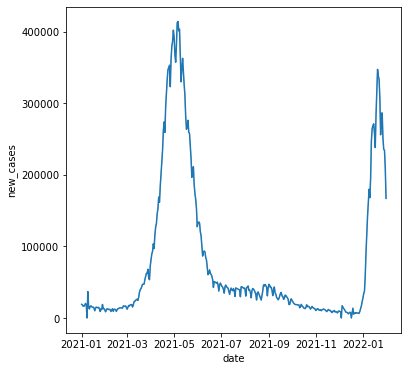

In [41]:
sns.lineplot(y = 'new_cases', x = 'date', data=df)

<AxesSubplot:xlabel='date', ylabel='new_vaccinations'>

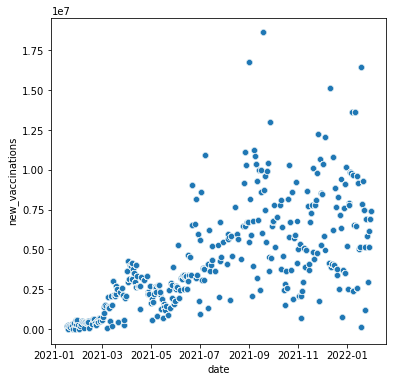

In [42]:
sns.scatterplot(y = 'new_vaccinations', x = 'date', data=df)

# Canada

In [4]:
df = pd.read_csv('canada_covid_health_df.csv')
df.date = df.date.apply(lambda x: '20'+x)
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date',ascending=True,inplace=True) 

In [86]:
st_dev_sen = df.neg_sentim_score.std() * 2
outliers_above = df.neg_sentim_score.mean() + st_dev_sen
outlier_below = df.neg_sentim_score.mean() - st_dev_sen
new_df = df[~ df.neg_sentim_score.apply(lambda x: (x >= outliers_above) or (x <= outlier_below))]
new_df.reset_index(inplace=True, drop=True)

<AxesSubplot:xlabel='date'>

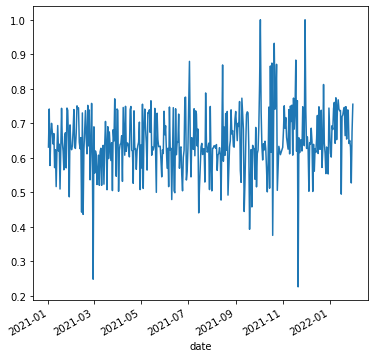

In [144]:
new_df.groupby('date')['neg_sentim_score'].median().plot()

<AxesSubplot:ylabel='neg_sentim_score'>

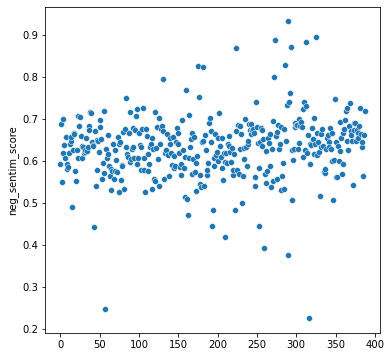

In [147]:
sns.scatterplot(x=np.arange(len(new_df.groupby('date').median())), y=new_df.groupby('date').mean()['neg_sentim_score'])

0.6345368318063109

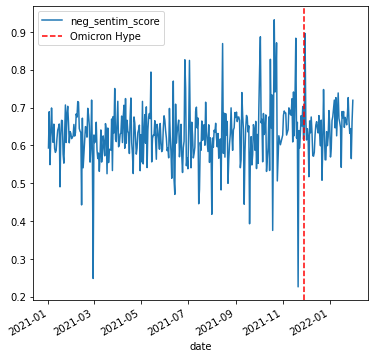

In [197]:
new_df.groupby('date')['neg_sentim_score'].mean().plot()

plt.axvline(x='2021-11-28', color='r', linestyle='--',linewidth=1.5, label='Omicron Hype')
plt.legend()

new_df.neg_sentim_score.mean() # on average it is more negative than positive.

<AxesSubplot:xlabel='date'>

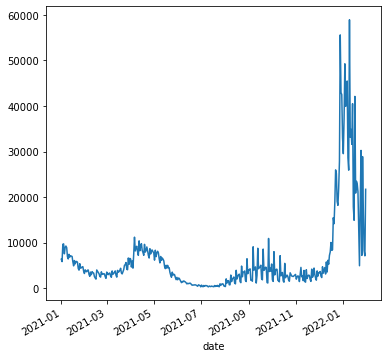

In [109]:
new_df.groupby('date')['new_cases'].mean().plot()

In [5]:
df['neg_sentim_score'] = df['new_negativ_sent_score']

In [97]:
df.neg_sentim_score.mean() # on average it is more negative than positive.

0.609584769241003

<AxesSubplot:xlabel='date'>

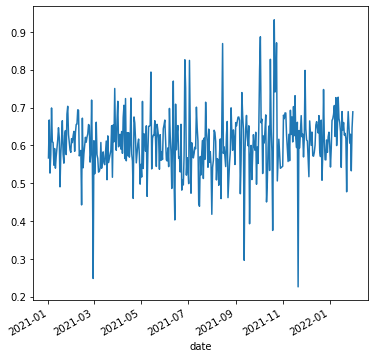

In [8]:
df.groupby('date')['neg_sentim_score'].mean().plot()

In [19]:
sentim = df.groupby('date')['neg_sentim_score'].mean()

<AxesSubplot:>

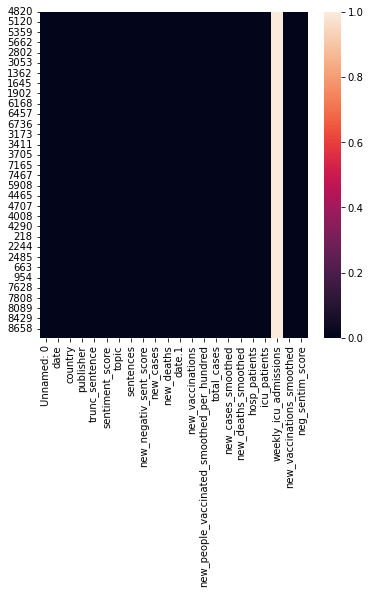

In [9]:
sns.heatmap(df.isna())

In [10]:
df.drop('weekly_icu_admissions', axis=1,inplace=True) # Column of all NA values.

In [22]:
df.isna().sum()

Unnamed: 0                                    0
date                                          0
country                                       0
publisher                                     0
trunc_sentence                                0
sentiment_score                               0
topic                                         0
sentences                                     0
new_negativ_sent_score                        0
new_cases                                     0
new_deaths                                    0
date.1                                        0
new_vaccinations                              0
new_people_vaccinated_smoothed_per_hundred    0
total_cases                                   0
new_cases_smoothed                            0
new_deaths_smoothed                           0
hosp_patients                                 0
icu_patients                                  0
new_vaccinations_smoothed                     0
neg_sentim_score                        

In [11]:
def calc_corr(col_feature, specific_dataframe):
    """ Takes in a given column health predictor and a dataframe of a specific timeline. 

    Returns:
        The correlation between the feature and the timeline. 
    """
    group_obj = specific_dataframe.groupby('date')
    correlation = np.corrcoef(group_obj.mean()[col_feature], group_obj.mean().neg_sentim_score)
    return np.around(correlation[0][1], 3)

In [12]:
calc_corr('new_people_vaccinated_smoothed_per_hundred', df)

-0.015

In [99]:
vaccines =  calc_corr('new_people_vaccinated_smoothed_per_hundred', new_df)

cases = calc_corr('new_cases', new_df)
new_cases_smoothed = calc_corr('new_cases_smoothed', new_df)
deaths = calc_corr('new_deaths', new_df)
new_deaths_smoothed = deaths = calc_corr('new_deaths_smoothed', new_df)
icu_patients = calc_corr('icu_patients', new_df)
hospital = calc_corr('hosp_patients',new_df)

In [100]:
print(f'sentimate correlation with cases: {cases}')
print(f'sentimate correlation with new_cases smoothed {new_cases_smoothed}')
print(f'sentimate correlation with deaths: {deaths}')
print(f'sentimate correlation with deaths smoothed: {new_deaths_smoothed}')
print(f'sentimate correlation with vaccines: {vaccines}')
print(f'sentimate correlation with icu_patients {icu_patients}')
print(f'sentimate correlation with hospital admissions {hospital}')


sentimate correlation with cases: 0.102
sentimate correlation with new_cases smoothed 0.108
sentimate correlation with deaths: 0.078
sentimate correlation with deaths smoothed: 0.078
sentimate correlation with vaccines: -0.043
sentimate correlation with icu_patients 0.064
sentimate correlation with hospital admissions 0.118


In [13]:
vaccines =  calc_corr('new_people_vaccinated_smoothed_per_hundred', df)

cases = calc_corr('new_cases', df)
new_cases_smoothed = calc_corr('new_cases_smoothed', df)
deaths = calc_corr('new_deaths', df)
new_deaths_smoothed = deaths = calc_corr('new_deaths_smoothed', df)
icu_patients = calc_corr('icu_patients', df)
hospital = calc_corr('hosp_patients',df)

In [108]:
df.columns

Index(['Unnamed: 0', 'date', 'country', 'publisher', 'trunc_sentence',
       'sentiment_score', 'topic', 'sentences', 'new_negativ_sent_score',
       'new_cases', 'new_deaths', 'date.1', 'new_vaccinations',
       'new_people_vaccinated_smoothed_per_hundred', 'total_cases',
       'new_cases_smoothed', 'new_deaths_smoothed', 'hosp_patients',
       'icu_patients', 'new_vaccinations_smoothed', 'neg_sentim_score'],
      dtype='object')

In [14]:
print(f'sentimate correlation with cases: {cases}')
print(f'sentimate correlation with new_cases smoothed {new_cases_smoothed}')
print(f'sentimate correlation with deaths: {deaths}')
print(f'sentimate correlation with deaths smoothed: {new_deaths_smoothed}')
print(f'sentimate correlation with vaccines: {vaccines}')
print(f'sentimate correlation with icu_patients {icu_patients}')
print(f'sentimate correlation with hospital admissions {hospital}')


sentimate correlation with cases: 0.121
sentimate correlation with new_cases smoothed 0.123
sentimate correlation with deaths: 0.076
sentimate correlation with deaths smoothed: 0.076
sentimate correlation with vaccines: -0.015
sentimate correlation with icu_patients 0.077
sentimate correlation with hospital 0.112


Text(0.5, 1.0, 'Canada Daily New Cases (2021-01 to 2022-02) ')

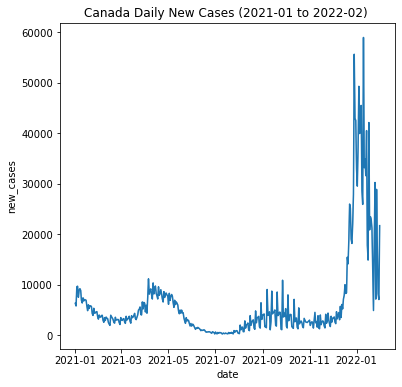

In [75]:
sns.lineplot(x=df.date,y=df.new_cases)
plt.title('Canada Daily New Cases (2021-01 to 2022-02)');

In [101]:
# Dataframes subset by timeline
decreasing_cases = new_df[(new_df.date >= '2021-04-25') & (new_df.date <= '2021-08-08')]
massive_decrease_cases = new_df[new_df.date >= '2022-01-01']
increasing_cases = new_df[(new_df.date >= '2021-12-01') & (new_df.date <= '2021-12-24')]

In [47]:
# Dataframes subset by timeline
decreasing_cases = df[(df.date >= '2021-04-25') & (df.date <= '2021-08-08')]
massive_decrease_cases = df[df.date >= '2022-01-01']
increasing_cases = df[(df.date >= '2021-12-01') & (df.date <= '2021-12-24')]

Average negative sentiment score: 0.631


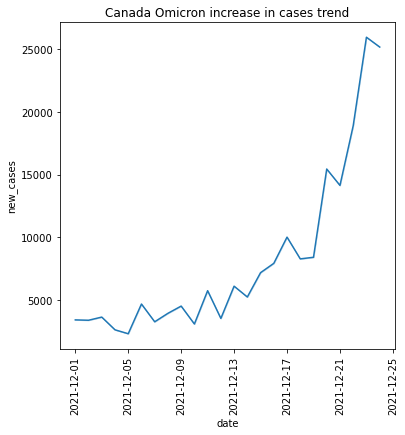

In [107]:
sns.lineplot(x='date',y='new_cases', data=increasing_cases)
plt.title('New covid cases increasing')
print(f'Average negative sentiment score: {np.around(increasing_cases.neg_sentim_score.mean(),3)}')
plt.xticks(rotation='vertical')
plt.title('Canada Omicron increase in cases trend');

Average negative sentiment score: 0.617


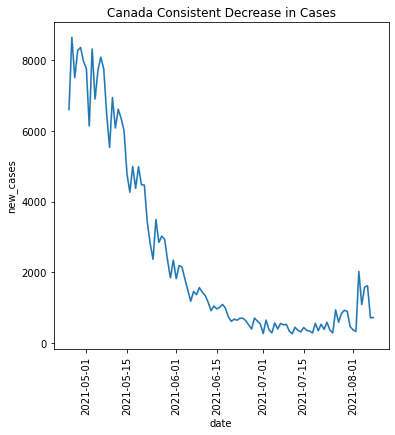

In [106]:
sns.lineplot(x='date',y='new_cases', data=decreasing_cases)
print(f'Average negative sentiment score: {np.around(decreasing_cases.neg_sentim_score.mean(),3)}')
plt.xticks(rotation='vertical')
plt.title('Canada Consistent Decrease in Cases');

Average negative sentiment score: 0.672


Text(0.5, 1.0, 'Canada Massive Decreases in Cases Trend')

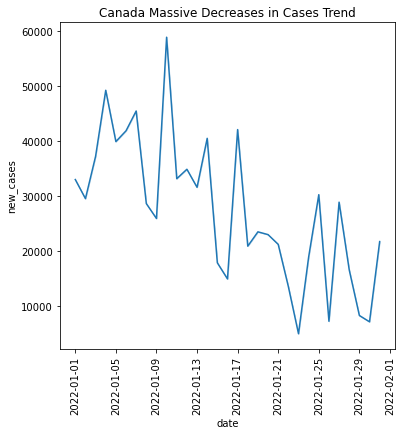

In [105]:
sns.lineplot(x='date',y='new_cases', data=massive_decrease_cases)
print(f'Average negative sentiment score: {np.around(massive_decrease_cases.neg_sentim_score.mean(),3)}')
plt.xticks(rotation='vertical')
plt.title('Canada Massive Decreases in Cases Trend')

In [102]:
print(calc_corr('hosp_patients', steady_cases))
print(calc_corr('hosp_patients', massive_decrease_cases))
print(calc_corr('hosp_patients', increasing_cases))

0.106
0.136
0.299


In [103]:
print(calc_corr('new_cases', steady_cases))
print(calc_corr('new_cases', massive_decrease_cases))
print(calc_corr('new_cases', increasing_cases))

0.087
0.211
0.115


In [104]:
print(calc_corr('new_cases_smoothed', steady_cases))
print(calc_corr('new_cases_smoothed', massive_decrease_cases))
print(calc_corr('new_cases_smoothed', increasing_cases))

0.079
0.032
0.151


# United States (Main Analysis)

In [2]:
df = pd.read_csv('country_df_sentim.csv')

In [13]:
df.groupby('country')['new_negativ_sent_score'].mean()

country
CA    0.609585
IN    0.634523
US    0.597426
Name: new_negativ_sent_score, dtype: float64

In [72]:
print(df.trunc_sentence.iloc[-1])
print()
print(f'negative sentiment score from this article: {np.around(df.neg_sentim_score.iloc[-1],3)}')

['  Sixty-two percent of Americans said they were concerned about someone in their family becoming seriously ill from COVID , and a slim majority supported " instituting , or reinstituting , face mask and social distancing guidelines in your state at the current time ', ' "  According to Patrick Murray , the director of Monmouth\'s Polling Institute , " Americans \' worries about COVID haven\'t gone away ', ' It seems more to be a realization that we are not going to get this virus under control in a way that we thought was possible just last year ', ' "  Monmouth also suggested that " faith in the ability of President Joe Biden and the federal government to get a handle on the pandemic continues to fade ', ' "  Only 43 percent of Americans said Biden has done a good job handling COVID , the first time his approval rating on this issue has dropped below 50 percent since he took office ', '  Expectations for the future disrupting life into 2023 or to continue to do so forever comprise 6

In [77]:
def annotate_check(num):
    print(df.trunc_sentence.iloc[num])
    print()
    print(f'negative sentiment score from this article: {np.around(df.neg_sentim_score.iloc[num],3)}')

In [83]:
annotate_check(-1)

['  Sixty-two percent of Americans said they were concerned about someone in their family becoming seriously ill from COVID , and a slim majority supported " instituting , or reinstituting , face mask and social distancing guidelines in your state at the current time ', ' "  According to Patrick Murray , the director of Monmouth\'s Polling Institute , " Americans \' worries about COVID haven\'t gone away ', ' It seems more to be a realization that we are not going to get this virus under control in a way that we thought was possible just last year ', ' "  Monmouth also suggested that " faith in the ability of President Joe Biden and the federal government to get a handle on the pandemic continues to fade ', ' "  Only 43 percent of Americans said Biden has done a good job handling COVID , the first time his approval rating on this issue has dropped below 50 percent since he took office ', '  Expectations for the future disrupting life into 2023 or to continue to do so forever comprise 6

In [98]:
annotate_check(2000)

[' A A A A A A A A A A A A new new new new new new new new new new new new , , , , , , , , , , , , grim grim grim grim grim grim grim grim grim grim grim grim daily daily daily daily daily daily daily daily daily daily daily daily death death death death death death death death death death death death record record record record record record record record record record record record ', " We We We We We We We We We We We We're're're're're're're're're're're're the the the the the the the the the the the the last last last last last last last last last last last last line line line line line line line line line line line line ", ' " " " " " " " " " " " "             About About About About About About About About About About About About 1', ' alone alone alone alone alone alone alone alone alone alone alone alone ', '  University of Hawaii says it wants more input in future of Aloha Stadium  By Ferd Lewis **25;2804;TOOLONG  Today  Updated 5:04 pm  The University of Hawaii has given the s

In [79]:
annotate_check(150)

["Chris Graythen/Getty  COVID-19 is still affecting NFL rosters heading into Sunday's regular-season finales -- and possibly beyond -- as star running back Alvin Kamara of the Saints reportedly tested positive and two of the Buccaneers ' top defenders will also sit out Sunday ", '  Kamara , coming off a league record-tying six-touchdown game , tested positive for COVID-19 , leaving his status for the postseason in question , according to multiple media reports ', '  Buccaneers linebacker Devin White tested positive for COVID-19 and outside linebacker Shaquil Barrett was deemed a high risk close contact , leaving Tampa Bay without the pair when it tries to clinch the top NFC wild-card spot Sunday ', "  Advertisement  The Bucs announced Friday both had been placed on the reserve/COVID-19 list , meaning both will miss Sunday's game against the Falcons ", "  Should Barrett keep testing negative , he'll be on track to the next two weeks would be a huge blow ", ' The second-year backer leads

In [84]:
annotate_check(320)

[' Nebraska Medicine and UNMC are part of those studies and are looking for people to participate ', ' Up to 1,000 people can participate in the study at UNMC ', ' Within the next few months , participants will be administered a placebo shot or the Novavax COVID-19 vaccine ', ' " The randomization scheme is weighted so that about two-thirds of the people will get the active vaccine and the third will get the placebo , " Dr', ' Mark Rupp said ', ' Rupp said the Novavax trail will be studied just like previous COVID-19 vaccine trials ', ' " Will one vaccine be better for treating elderly people or immunosuppressed people ? Will one have a longer-lasting level of immunity those are the things we\'re looking for as we test these new types of vaccines , " Rupp said ', " It's a Phase 3 trial "]

negative sentiment score from this article: 0.382


In [54]:
# Reads in health data from Our World in Data.
df = pd.read_csv('us_covid_health_df.csv')
df.date = df.date.apply(lambda x: '20'+x)
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date',ascending=True,inplace=True) 
df['neg_sentim_score'] = df['new_negativ_sent_score']

In [55]:
# Removes score outliers 3 standard deviations from the mean.
st_dev_sen = df.neg_sentim_score.std() * 3
outliers_above = df.neg_sentim_score.mean() + st_dev_sen
outlier_below = df.neg_sentim_score.mean() - st_dev_sen
df = df[~ df.neg_sentim_score.apply(lambda x: (x >= outliers_above) or (x <= outlier_below))]
df.reset_index(inplace=True, drop=True)
new_df = df.copy()

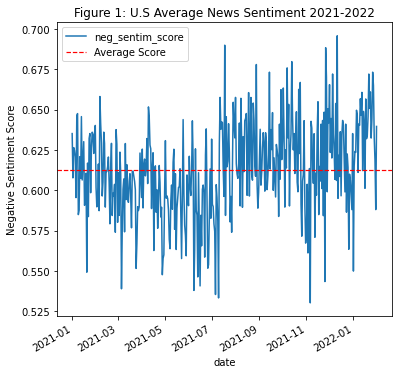

In [31]:
df.groupby('date')['neg_sentim_score'].mean().plot()
plt.title('Figure 1: U.S Average News Sentiment 2021-2022')
plt.ylabel('Negative Sentiment Score');
plt.axhline(y=np.mean(df['neg_sentim_score']), color='r', linestyle='--',linewidth=1.2, label='Average Score')
plt.legend()
plt.savefig('fig1')

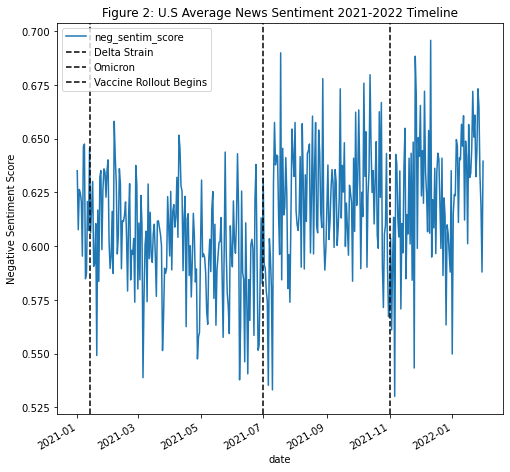

In [30]:
plt.figure(figsize=(8,8))
df.groupby('date')['neg_sentim_score'].mean().plot()
plt.title('Figure 2: U.S Average News Sentiment 2021-2022 Timeline')
plt.ylabel('Negative Sentiment Score');
plt.axvline(x='2021-07-01', color='k', linestyle='--',linewidth=1.5, label='Delta Strain')
plt.axvline(x='2021-11-01', color='k', linestyle='--',linewidth=1.5, label='Omicron')
plt.axvline(x='2021-01-13', color='k', linestyle='--',linewidth=1.5, label='Vaccine Rollout Begins')

plt.legend()
plt.savefig('fig2')

In [33]:
df.columns

Index(['Unnamed: 0', 'date', 'country', 'publisher', 'trunc_sentence',
       'sentiment_score', 'topic', 'sentences', 'new_negativ_sent_score',
       'new_cases', 'new_deaths', 'new_vaccinations',
       'new_people_vaccinated_smoothed_per_hundred', 'total_cases',
       'new_cases_smoothed', 'new_deaths_smoothed', 'hosp_patients',
       'icu_patients', 'weekly_icu_admissions', 'new_vaccinations_smoothed',
       'health_date', 'neg_sentim_score'],
      dtype='object')

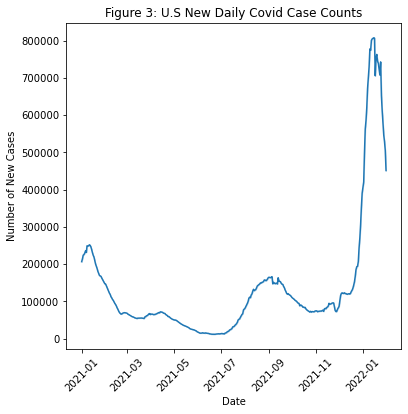

In [86]:
sns.lineplot(x=df.date, y=df.new_cases_smoothed)
plt.title('Figure 3: U.S New Daily Covid Case Counts')
plt.ylabel('Number of New Cases')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.savefig('fig3')

In [35]:
df.neg_sentim_score.mean() # on average it is more negative than positive.

0.6127474414028846

In [36]:
df.drop('weekly_icu_admissions', axis=1,inplace=True) # Column of all NA values.

In [37]:
def calc_corr(col_feature, specific_dataframe):
    """ Takes in a given column health predictor and a dataframe of a specific timeline. 

    Returns:
        The correlation between the feature and the timeline. 
    """
    group_obj = specific_dataframe.groupby('date')
    correlation = np.corrcoef(group_obj.mean()[col_feature], group_obj.mean().neg_sentim_score)
    return np.around(correlation[0][1], 3)

In [38]:
calc_corr('new_people_vaccinated_smoothed_per_hundred', df)

-0.192

In [56]:
vaccines =  calc_corr('new_people_vaccinated_smoothed_per_hundred', new_df)
cases = calc_corr('new_cases', new_df)
new_cases_smoothed = calc_corr('new_cases_smoothed', new_df)
deaths = calc_corr('new_deaths', new_df)
new_deaths_smoothed = deaths = calc_corr('new_deaths_smoothed', new_df)
icu_patients = calc_corr('icu_patients', new_df)
hospital = calc_corr('hosp_patients',new_df)

In [57]:
print(f'sentimate correlation with cases: {cases}')
print(f'sentimate correlation with new_cases smoothed {new_cases_smoothed}')
print(f'sentimate correlation with deaths: {deaths}')
print(f'sentimate correlation with deaths smoothed: {new_deaths_smoothed}')
print(f'sentimate correlation with vaccines: {vaccines}')
print(f'sentimate correlation with icu_patients {icu_patients}')
print(f'sentimate correlation with hospital admissions {hospital}')


sentimate correlation with cases: 0.297
sentimate correlation with new_cases smoothed 0.317
sentimate correlation with deaths: 0.216
sentimate correlation with deaths smoothed: 0.216
sentimate correlation with vaccines: -0.192
sentimate correlation with icu_patients 0.371
sentimate correlation with hospital admissions 0.366


In [58]:
vaccines =  calc_corr('new_people_vaccinated_smoothed_per_hundred', df)
cases = calc_corr('new_cases', df)
new_cases_smoothed = calc_corr('new_cases_smoothed', df)
deaths = calc_corr('new_deaths', df)
new_deaths_smoothed = deaths = calc_corr('new_deaths_smoothed', df)
icu_patients = calc_corr('icu_patients', df)
hospital = calc_corr('hosp_patients',df)

In [59]:
print(f'sentimate correlation with cases: {cases}')
print(f'sentimate correlation with new_cases smoothed {new_cases_smoothed}')
print(f'sentimate correlation with deaths: {deaths}')
print(f'sentimate correlation with deaths smoothed: {new_deaths_smoothed}')
print(f'sentimate correlation with vaccines: {vaccines}')
print(f'sentimate correlation with icu_patients {icu_patients}')
print(f'sentimate correlation with hospital admissions {hospital}')


sentimate correlation with cases: 0.297
sentimate correlation with new_cases smoothed 0.317
sentimate correlation with deaths: 0.216
sentimate correlation with deaths smoothed: 0.216
sentimate correlation with vaccines: -0.192
sentimate correlation with icu_patients 0.371
sentimate correlation with hospital admissions 0.366


In [60]:
# Dataframes subset by timeline
decreasing_cases = new_df[(new_df.date >= '2021-01-05') & (new_df.date <= '2021-07-08')]
massive_decrease_cases = new_df[new_df.date >= '2022-01-20']
increasing_cases = new_df[(new_df.date >= '2021-12-20') & (new_df.date <= '2022-01-27')]
steady_case = new_df[(new_df.date >= '2021-03-20') & (new_df.date <= '2021-06-27')]

In [61]:
# print(np.mean(decreasing_cases.neg_sentim_score))
print(np.mean(increasing_cases.neg_sentim_score))
print(np.mean(massive_decrease_cases.neg_sentim_score))
print(np.mean(steady_case.neg_sentim_score))

0.6304542977372399
0.6464882787326507
0.5973212448686032


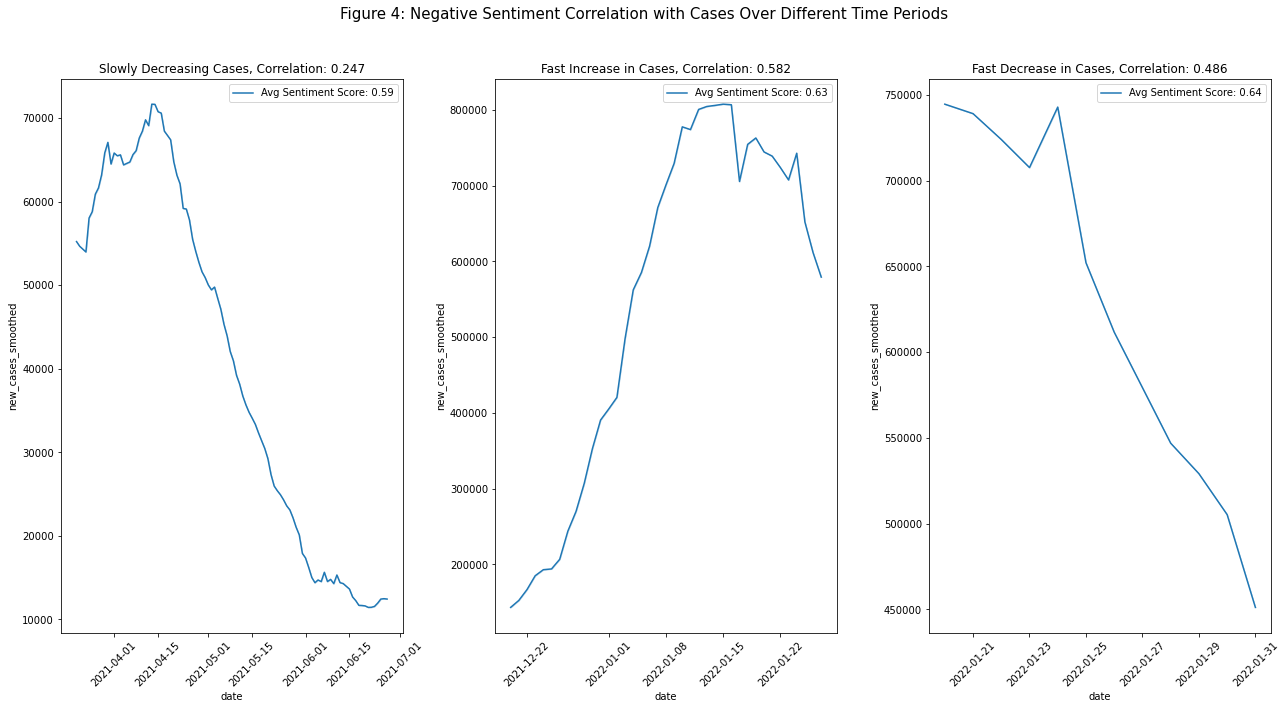

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

axes[0].set_title(f'Slowly Decreasing Cases, Correlation: 0.247')
sns.lineplot(x='date',y='new_cases_smoothed', data=steady_case, ax=axes[0], label='Avg Sentiment Score: 0.59')
for tick in axes[0].get_xticklabels():
        tick.set_rotation(45)

axes[1].set_title(f'Fast Increase in Cases, Correlation: 0.582')
sns.lineplot(x='date',y='new_cases_smoothed', data=increasing_cases, ax=axes[1], label='Avg Sentiment Score: 0.63')
for tick in axes[1].get_xticklabels():
        tick.set_rotation(45)

axes[2].set_title(f'Fast Decrease in Cases, Correlation: 0.486')
sns.lineplot(x='date',y='new_cases_smoothed', data=massive_decrease_cases, ax=axes[2], label='Avg Sentiment Score: 0.64')
for tick in axes[2].get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout()

plt.suptitle('Figure 4: Negative Sentiment Correlation with Cases Over Different Time Periods', fontsize=15)
fig.subplots_adjust(top=0.88)
plt.savefig('fig4.png')

In [ ]:
print(calc_corr('new_cases_smoothed', decreasing_cases))
print(calc_corr('new_cases_smoothed', massive_decrease_cases))
print(calc_corr('new_cases_smoothed', increasing_cases))
print(calc_corr('new_cases_smoothed', steady_case))

0.321
0.486
0.582
0.247


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

axes[0].set_title(f'Slowly Decreasing Cases, Correlation: 0.247')
sns.lineplot(x='date',y='new_cases_smoothed', data=steady_case, ax=axes[0])
for tick in axes[0].get_xticklabels():
        tick.set_rotation(45)

axes[1].set_title(f'Fast Increase in Cases, Correlation: 0.582')
sns.lineplot(x='date',y='new_cases_smoothed', data=increasing_cases, ax=axes[1])
for tick in axes[1].get_xticklabels():
        tick.set_rotation(45)

axes[2].set_title(f'Fast Decrease in Cases, Correlation: 0.486')
sns.lineplot(x='date',y='new_cases_smoothed', data=massive_decrease_cases, ax=axes[2])
for tick in axes[2].get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout()

plt.suptitle('Figure 3: Negative Sentiment Correlation with Cases Over Different Time Periods', fontsize=15)
fig.subplots_adjust(top=0.85)
plt.savefig('fig3.png')

In [ ]:
print(np.mean(decreasing_cases.neg_sentim_score))
print(np.mean(increasing_cases.neg_sentim_score))
print(np.mean(massive_decrease_cases.neg_sentim_score))

0.6031571455874498
0.6304542977372399
0.6464882787326507


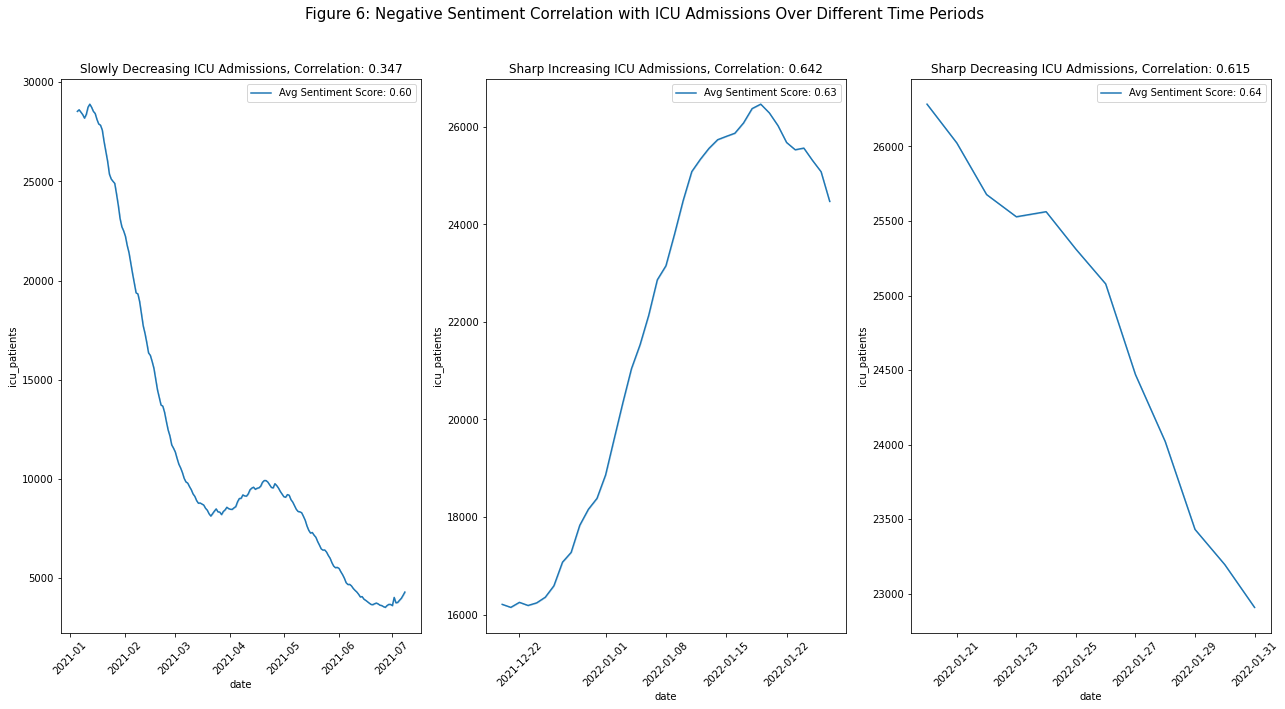

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

axes[0].set_title(f'Slowly Decreasing ICU Admissions, Correlation: 0.347')
sns.lineplot(x='date',y='icu_patients', data=decreasing_cases, ax=axes[0], label='Avg Sentiment Score: 0.60')
for tick in axes[0].get_xticklabels():
        tick.set_rotation(45)

axes[1].set_title(f'Sharp Increasing ICU Admissions, Correlation: 0.642')
sns.lineplot(x='date',y='icu_patients', data=increasing_cases, ax=axes[1], label='Avg Sentiment Score: 0.63')
for tick in axes[1].get_xticklabels():
        tick.set_rotation(45)


axes[2].set_title(f'Sharp Decreasing ICU Admissions, Correlation: 0.615')
sns.lineplot(x='date',y='icu_patients', data=massive_decrease_cases, ax=axes[2], label='Avg Sentiment Score: 0.64')
for tick in axes[2].get_xticklabels():
        tick.set_rotation(45)

plt.tight_layout()
fig.subplots_adjust(top=0.88)
plt.suptitle('Figure 6: Negative Sentiment Correlation with ICU Admissions Over Different Time Periods', fontsize=15)
plt.savefig('fig6.png')

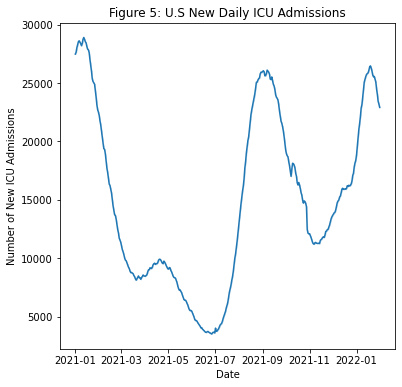

In [40]:
sns.lineplot(x='date', y='icu_patients', data=df)
plt.title('Figure 5: U.S New Daily ICU Admissions')
plt.ylabel('Number of New ICU Admissions')
plt.xlabel('Date')
plt.savefig('fig5')

Text(0.5, 0, 'Date')

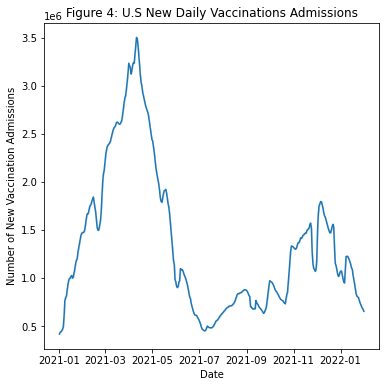

In [41]:
sns.lineplot(x='date', y='new_vaccinations_smoothed', data=df)
plt.title('Figure 4: U.S New Daily Vaccinations Admissions')
plt.ylabel('Number of New Vaccination Admissions')
plt.xlabel('Date')
# plt.savefig('fig4')

In [179]:
def permutation_test(dataframe, column_name, num_perm=15000):
    """ Permutation test for robustness of correlations.
    """
    permutation_statistics = []
    # original_statistic = np.abs(calc_corr(column_name, dataframe))
    original_statistic = np.abs(np.corrcoef(dataframe[column_name], dataframe['neg_sentim_score'])[1][0])
    for i in range(num_perm):   
        shuffled_df = np.random.permutation(dataframe['neg_sentim_score'])
        perm_statistic = np.corrcoef(dataframe[column_name], shuffled_df)[1][0]
        permutation_statistics.append(perm_statistic)
    permutation_statistics = np.array(permutation_statistics)
    p_val = (1 + sum(np.abs(permutation_statistics) >= original_statistic))/(1 + num_perm)
    return np.around(p_val,4)

In [180]:
# Dataframes subset by timeline
massive_decrease_vax = new_df[(new_df.date >= '2021-05-01') & (new_df.date <= '2021-07-01')]
quick_increasing_vax = new_df[(new_df.date <= '2021-01-05')]
steady_case_vax = new_df[(new_df.date >= '2021-07-08') & (new_df.date <= '2022-01-01')]

In [198]:
# Vaccinations Correlation Tests
print(calc_corr('new_vaccinations_smoothed', massive_decrease_vax))
print(calc_corr('new_vaccinations_smoothed', quick_increasing_vax))
print(calc_corr('new_vaccinations_smoothed', steady_case_vax))

print('Permutation Test Vaccine Admission')
print(permutation_test(dataframe=massive_decrease_vax, column_name='new_vaccinations_smoothed'))
print(permutation_test(dataframe=quick_increasing_vax, column_name='new_vaccinations_smoothed'))
print(permutation_test(dataframe=steady_case_vax, column_name='new_vaccinations_smoothed'))

print(permutation_test(dataframe=df, column_name='new_vaccinations_smoothed'))

0.063
-0.322
-0.043
Permutation Test Vaccine Admission
0.5482
0.6924
0.1715
0.0001


In [199]:
print(calc_corr('icu_patients', decreasing_cases))
print(calc_corr('icu_patients', massive_decrease_cases))
print(calc_corr('icu_patients', increasing_cases))

print('Permutation Test ICU admissions')
print(permutation_test(dataframe=decreasing_cases, column_name='icu_patients'))
print(permutation_test(dataframe=massive_decrease_cases, column_name='icu_patients'))
print(permutation_test(dataframe=increasing_cases, column_name='icu_patients'))

print(permutation_test(dataframe=df, column_name='icu_patients'))

0.331
0.615
0.642
Permutation Test ICU admissions
0.0001
0.0958
0.0001
0.0001


In [200]:
print(calc_corr('new_deaths_smoothed', decreasing_cases))
print(calc_corr('new_deaths_smoothed', massive_decrease_cases))
print(calc_corr('new_deaths_smoothed', increasing_cases))
print('Permutation Test New Deaths')
print(permutation_test(dataframe=decreasing_cases, column_name='new_deaths_smoothed'))
print(permutation_test(dataframe=massive_decrease_cases, column_name='new_deaths_smoothed'))
print(permutation_test(dataframe=increasing_cases, column_name='new_deaths_smoothed'))

print(permutation_test(dataframe=df, column_name='new_deaths_smoothed'))

0.347
-0.472
0.586
Permutation Test New Deaths
0.0001
0.2309
0.0001
0.0001


In [201]:
print(calc_corr('hosp_patients', decreasing_cases))
print(calc_corr('hosp_patients', massive_decrease_cases))
print(calc_corr('hosp_patients', increasing_cases))
print('Permutation Test Hospital Admissions')
print(permutation_test(dataframe=decreasing_cases, column_name='hosp_patients'))
print(permutation_test(dataframe=massive_decrease_cases, column_name='hosp_patients'))
print(permutation_test(dataframe=increasing_cases, column_name='hosp_patients'))

print(permutation_test(dataframe=df, column_name='hosp_patients'))

0.327
0.634
0.626
Permutation Test Hospital Admissions
0.0001
0.084
0.0001
0.0001


In [202]:
print(calc_corr('new_cases_smoothed', decreasing_cases))
print(calc_corr('new_cases_smoothed', massive_decrease_cases))
print(calc_corr('new_cases_smoothed', increasing_cases))
print(calc_corr('new_cases_smoothed', steady_case))
print('Permutation Test New Cases')
# Permutation Robustness check:
print(permutation_test(dataframe=decreasing_cases, column_name='new_cases_smoothed'))
print(permutation_test(dataframe=massive_decrease_cases, column_name='new_cases_smoothed'))
print(permutation_test(dataframe=increasing_cases, column_name='new_cases_smoothed'))
print(permutation_test(dataframe=steady_case, column_name='new_cases_smoothed'))

print(permutation_test(dataframe=df, column_name='new_cases_smoothed'))


0.321
0.486
0.582
0.247
Permutation Test New Cases
0.0001
0.2459
0.0001
0.0017
0.0001


<AxesSubplot:xlabel='date', ylabel='new_cases_smoothed'>

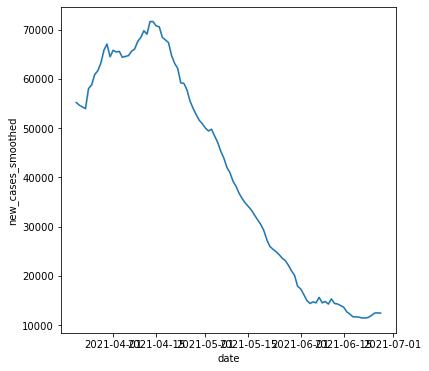

In [195]:
sns.lineplot(data=steady_case, x='date', y= 'new_cases_smoothed')

# Entire Article Dataset

In [99]:
a_df = pd.read_csv('all_country_sentiment.csv')

In [100]:
a_df.head()

,Unnamed: 0,Unnamed: 0.1,date,country,trunc_sentence,sentiment_score,topic,new_negativ_sent_score
0,0,0,21-10-01,US,"["" ( File photo by Watchara Phomicinda , The P...","[{'label': 'NEGATIVE', 'score': 0.990002155303...",4,0.6356704742064165
1,1,1,21-10-01,US,"[' 5 , 2020 file photo , a sign for Wall Stree...","[{'label': 'NEGATIVE', 'score': 0.756866037845...",0,0.48695794535718284
2,2,2,21-10-01,US,"[' 1 , 2021 /PRNewswire/ - Metalla Royalty &am...","[{'label': 'NEGATIVE', 'score': 0.970434188842...",1,0.7472852153916874
3,3,3,21-10-01,US,[' The league-wide rate is now around 95% whe...,"[{'label': 'NEGATIVE', 'score': 0.993281245231...",1,0.7549512239325824
4,4,4,21-10-01,US,[' ( NYSE:MDLA ) relating to its proposed acqu...,"[{'label': 'NEGATIVE', 'score': 0.971785485744...",1,0.5180692370077801


In [101]:
len(a_df)

127843

In [111]:
a_df = a_df[a_df['new_negativ_sent_score'] != 'no']
a_df['new_negativ_sent_score'] = a_df['new_negativ_sent_score'].apply(lambda x: float(x))

In [113]:
a_df.country.value_counts()

US    50114
IN    13950
CA     8770
GB     8626
AU     7503
PH     5671
IE     5271
MY     4483
NZ     4046
ZA     3590
SG     2924
NG     1887
BD     1716
??     1587
PK     1288
LK     1241
KE      956
HK      618
JM      376
GH      342
TZ      203
Name: country, dtype: int64

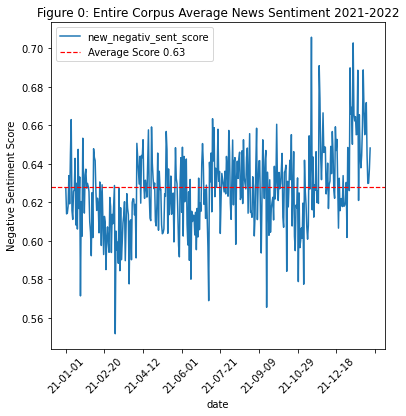

In [120]:
a_df.groupby('date')['new_negativ_sent_score'].mean().plot()
plt.title('Figure 0: Entire Corpus Average News Sentiment 2021-2022')
plt.ylabel('Negative Sentiment Score');
plt.axhline(y=np.mean(a_df['new_negativ_sent_score']), color='r', linestyle='--',linewidth=1.2, label='Average Score 0.63')
plt.xticks(rotation=45)
plt.legend()
plt.savefig('fig0')

In [115]:
np.mean(a_df.groupby('date')['new_negativ_sent_score'].mean()) # Global average

0.626598982572708